For running on Google Colab, mount the default path. And, install `pretty midi`, since it's not a common library that Google Colab has embedded.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install pretty_midi

In [ ]:
# Set up the path of the project. The default setting is for Google Colab.
projectpath='/content/drive/MyDrive/Colab_Notebooks/deeppiano/' 

In [ ]:
# import sys
# sys.path.append(projectpath)

In [3]:
from tensorflow.keras.optimizers import Adam
import run_model

## Designate a composer

In [5]:
composer_dict = run_model.composer_list()
composer_num = input(f"Please pick a number from the composer list below: {composer_dict}")

# if don't input any number, pick 33: Mozart
if len(composer_num) == 0:
    composer_num = 33
    
print('Your input number: ', composer_num)
print('You picked composer: ', composer_dict[int(composer_num)])

Please pick a number from the composer list below: {0: 'Albéniz', 1: 'Bach', 2: 'Balakirev', 3: 'Beethoven', 4: 'Berg', 5: 'Bizet', 6: 'Brahms', 7: 'Busoni', 8: 'Chopin', 9: 'Clementi', 10: 'Cziffra', 11: 'Debussy', 12: 'Enescu', 13: 'Fischer', 14: 'Franck', 15: 'Gibbons', 16: 'Glinka', 17: 'Godowsky', 18: 'Gounod', 19: 'Grainger', 20: 'Grieg', 21: 'Gryaznov', 22: 'Grünfeld', 23: 'Handel', 24: 'Haydn', 25: 'Hess', 26: 'Horowitz', 27: 'Janáček', 28: 'Kreisler', 29: 'Liszt', 30: 'Medtner', 31: 'Mendelssohn', 32: 'Moszkowski', 33: 'Mozart', 34: 'Mussorgsky', 35: 'Pachelbel', 36: 'Paganini', 37: 'Petri', 38: 'Pletnev', 39: 'Purcell', 40: 'Rachmaninoff', 41: 'Rameau', 42: 'Rimsky-Korsakov', 43: 'Saint-Saëns', 44: 'Scarlatti', 45: 'Schubert', 46: 'Schumann', 47: 'Scriabin', 48: 'Soler', 49: 'Strauss', 50: 'Tchaikovsky', 51: 'Verdi', 52: 'Wagner', 53: 'von Weber'}33
Your input number:  33
You picked composer:  Mozart


Pick parameters for the Adam optimizer

In [ ]:
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
decay = 0.01

Pick parameters for piano music generating

In [ ]:
fs = 10                # Sampling frequency of the columns, i.e. each column is spaced apart by ``1./fs`` seconds.
seq_len = 100          # The sequence length of the music to be input of neural network
batch_music = 16       # A number of music in one batch   
n_a = 1024             # number of dimensions for the hidden state of each LSTM cell.
epochs = 200           # The number of how many times the model will be trained
random_song = True     # If randomly pick musics from the picked composer's midi list
random_trim = True     # If randomly cut a piece from the picked music

X shape: (1, 200, 95)
Y shape:(200, 1, 95)
file name:
 /content/drive/MyDrive/Colab_Notebooks/deeppiano/result/result_composer(Mozart)-fs(5)-seq_len(200)-batch_music(1)-random_song(True)-random_trim(True)-na(512)-epochs(200)-name(Adam)-learning_rate(0_03)-decay(0_01)-beta_1(0_9)-beta_2(0_999)-epsilon(1e-07)-amsgrad(False)
loss at epoch 1: 906.143798828125
loss at epoch 200: 256.2835388183594
generated_results.shape:  (200, 95)
X shape: (1, 200, 95)
Y shape:(200, 1, 95)
file name:
 /content/drive/MyDrive/Colab_Notebooks/deeppiano/result/result_composer(Mozart)-fs(5)-seq_len(200)-batch_music(1)-random_song(True)-random_trim(True)-na(512)-epochs(200)-name(Adam)-learning_rate(0_001)-decay(0_01)-beta_1(0_9)-beta_2(0_999)-epsilon(1e-07)-amsgrad(False)
loss at epoch 1: 905.0330810546875
loss at epoch 200: 166.54672241210938
generated_results.shape:  (200, 95)
X shape: (1, 200, 95)
Y shape:(200, 1, 95)
file name:
 /content/drive/MyDrive/Colab_Notebooks/deeppiano/result/result_composer(Mozart)-

ValueError: ignored

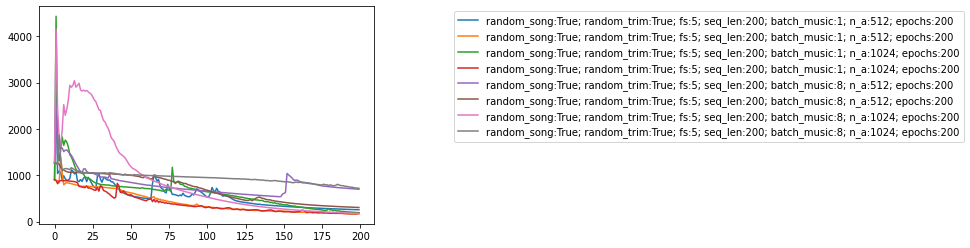

In [ ]:
opt = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, decay=decay)
run_model.main_run(random_song=random_song, random_trim=random_trim,
                    composer_num=int(composer_num), fs=fs, 
                    seq_len=seq_len, batch_music=batch_music, 
                    n_a=n_a, epochs=epochs, opt=opt,
                    projectpath=projectpath)